In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,time,timedelta,date
import math
from pandas.plotting import scatter_matrix
%matplotlib inline

In [97]:
AdvWorksCusts = pd.read_csv('AdvWorksCusts.csv')
AW_BikeBuyer = pd.read_csv('AW_BikeBuyer.csv')
AW_AveMonthSpend = pd.read_csv('AW_AveMonthSpend.csv')

In [98]:
AdvWorksCusts.drop_duplicates(subset=['CustomerID'], keep='first', inplace=True)
AW_BikeBuyer.drop_duplicates(subset=['CustomerID'], keep='first', inplace=True)
AW_AveMonthSpend.drop_duplicates(subset=['CustomerID'], keep='first', inplace=True)

In [99]:
df = pd.merge(AdvWorksCusts, AW_AveMonthSpend, on='CustomerID')
df = pd.merge(df, AW_BikeBuyer, on='CustomerID')

In [100]:
print(df.shape)

(16404, 25)


In [101]:
df.drop(['Title','FirstName','LastName','MiddleName','Suffix','AddressLine1',
           'AddressLine2','StateProvinceName','PhoneNumber','City', 'PostalCode'], axis=1, inplace=True)

In [102]:
df.dtypes

CustomerID               int64
CountryRegionName       object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
AveMonthSpend            int64
BikeBuyer                int64
dtype: object

In [103]:
def count_unique(df, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(df[col].value_counts())
cat_cols = ['Education', 'Occupation', 'Gender','MaritalStatus','CountryRegionName','BikeBuyer','HomeOwnerFlag']
count_unique(df, cat_cols)


For column Education
Bachelors              4758
Partial College        4451
High School            2944
Graduate Degree        2851
Partial High School    1400
Name: Education, dtype: int64

For column Occupation
Professional      4922
Skilled Manual    4038
Management        2718
Clerical          2597
Manual            2129
Name: Occupation, dtype: int64

For column Gender
M    8290
F    8114
Name: Gender, dtype: int64

For column MaritalStatus
M    8852
S    7552
Name: MaritalStatus, dtype: int64

For column CountryRegionName
United States     6935
Australia         3194
United Kingdom    1709
France            1591
Germany           1577
Canada            1398
Name: CountryRegionName, dtype: int64

For column BikeBuyer
0    10953
1     5451
Name: BikeBuyer, dtype: int64

For column HomeOwnerFlag
1    11058
0     5346
Name: HomeOwnerFlag, dtype: int64


In [104]:
df['BirthDate'] =  pd.to_datetime(df['BirthDate'])
df['Coll_date']=date(year = 1998, month = 1, day = 1)
df['Coll_date']=pd.to_datetime(df['Coll_date'])
df['Age_days'] = df['Coll_date']- df['BirthDate']
df['Age'] =  df['Age_days'].astype('timedelta64[Y]')

In [105]:
df.drop(['Coll_date','Age_days', 'BirthDate'], axis=1, inplace=True)
df['Age'] = df['Age'].astype(int)

In [106]:
df.head()

,CustomerID,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
0,11000,Australia,Bachelors,Professional,M,M,1,0,0,2,137947,89,0,31
1,11001,Australia,Bachelors,Professional,M,S,0,1,3,3,101141,117,1,32
2,11002,Australia,Bachelors,Professional,M,M,1,1,3,3,91945,123,0,32
3,11003,Australia,Bachelors,Professional,F,S,0,1,0,0,86688,50,0,29
4,11004,Australia,Bachelors,Professional,F,S,1,4,5,5,92771,95,1,29


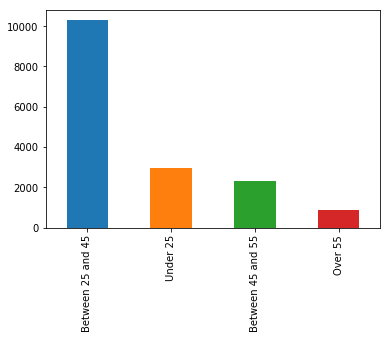

In [107]:
df['AgeRange'] = ['Under 25' if ((x < 25)) 
                   else 'Between 25 and 45' if ((x>=25 and x<=45)) 
                   else 'Between 45 and 55' if ((x>45  and x<=55))
                   else 'Over 55' if ((x>55))
                   else x for x in df['Age']]
df['AgeRange'].value_counts().plot(kind='bar')

In [108]:
df['CountryRegionName']= df['CountryRegionName'].astype('category')
df['Education']= df['Education'].astype('category')
df['Occupation']= df['Occupation'].astype('category')
df['Gender']= df['Gender'].astype('category')
df['MaritalStatus']= df['MaritalStatus'].astype('category')
df['AgeRange']= df['AgeRange'].astype('category')
df['BikeBuyer']= df['BikeBuyer'].astype('category')
df['HomeOwnerFlag']=df['HomeOwnerFlag'].astype('category')

In [109]:
df.dtypes

CustomerID                 int64
CountryRegionName       category
Education               category
Occupation              category
Gender                  category
MaritalStatus           category
HomeOwnerFlag           category
NumberCarsOwned            int64
NumberChildrenAtHome       int64
TotalChildren              int64
YearlyIncome               int64
AveMonthSpend              int64
BikeBuyer               category
Age                        int32
AgeRange                category
dtype: object

In [110]:
df['log_YearlyIncome'] = np.log(df['YearlyIncome'])

In [111]:
df.drop(['NumberChildrenAtHome','Age','AveMonthSpend', 'HomeOwnerFlag', 'YearlyIncome'], 
          axis=1, inplace=True)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16404 entries, 0 to 16403
Data columns (total 11 columns):
CustomerID           16404 non-null int64
CountryRegionName    16404 non-null category
Education            16404 non-null category
Occupation           16404 non-null category
Gender               16404 non-null category
MaritalStatus        16404 non-null category
NumberCarsOwned      16404 non-null int64
TotalChildren        16404 non-null int64
BikeBuyer            16404 non-null category
AgeRange             16404 non-null category
log_YearlyIncome     16404 non-null float64
dtypes: category(7), float64(1), int64(3)
memory usage: 754.0 KB


In [113]:
df.to_csv('Class_BikeBuyer.csv', index = False, header = True)